In [ ]:

#Place in the postcodes and miles around them.
# If there is a 404 produced in the output you may have run to many searches in an hour or entered the postocde incorrctly so check the web string on the site
# For the radius in miles make sure you check the autotrader website for the allowed number of miles 
#https://www.autotrader.co.uk/

postcode_buy="NE1 5XE" 
radius_buy=10

postcode_sell="UB7 0AW" 
radius_sell=25

#Remeber to check the maximum and minimum years allowed on the website 
min_year=2006
max_year=2020
min_price=0
max_price=2000

#State how many brands/ models you want to show in the final graphs 
no_brands = 50
no_models = 50

import argparse

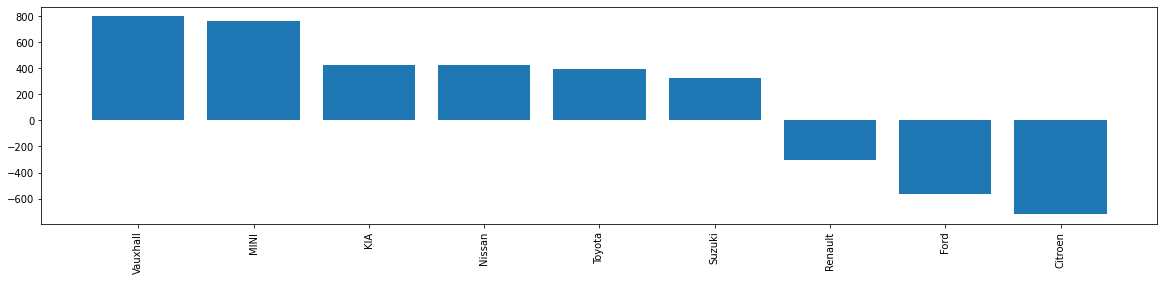

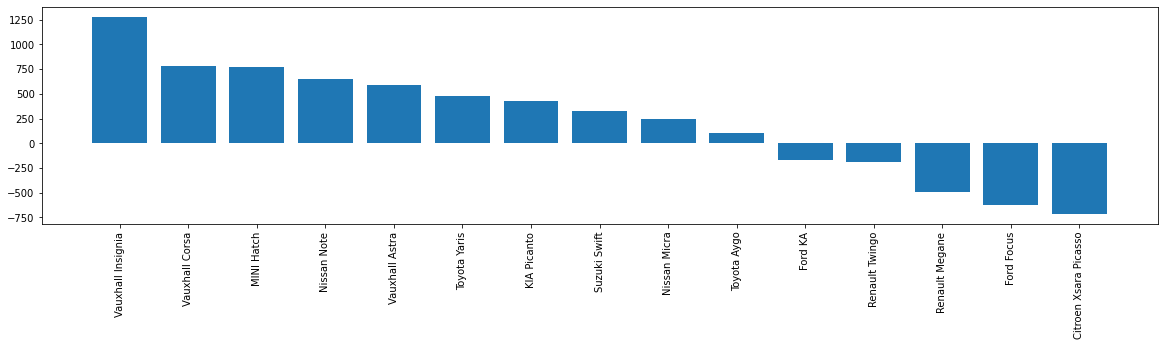

In [14]:
#Run this cell to get the output
import requests
import json
import csv
from bs4 import BeautifulSoup
import Modules.Car_func as cf
import traceback
import cloudscraper
import pandas as pd
import numpy as np
import seaborn as sns
from decimal import Decimal
from re import sub
import matplotlib.pyplot as plt
from datetime import date
import os
import shutil
%matplotlib inline

#Run retrieve cars to get the cars from the buy and sell locations 
location_buy = cf.retrieve_cars(
                           postcode = postcode_buy,
                           radius = radius_buy ,
                           min_year = min_year ,
                           max_year = max_year ,
                           min_price = min_price,
                           max_price = max_price,
                           location_type = 'buy')

location_sell = cf.retrieve_cars(
                           postcode = postcode_sell,
                           radius = radius_sell,
                           min_year = min_year ,
                           max_year = max_year ,
                           min_price = min_price,
                           max_price = max_price ,
                           location_type = 'sell')

#Create saved files of the by and sell locations 
location_buy.to_csv('location_tables\\location_buy.csv')
location_sell.to_csv('location_tables\\location_sell.csv')

location_buy = pd.read_csv('location_tables\\location_buy.csv').drop('Unnamed: 0',axis = 1)
location_sell = pd.read_csv('location_tables\\location_sell.csv').drop('Unnamed: 0',axis = 1)

#Match cars based on model and year
car_match = location_buy.merge(location_sell, how = 'inner', left_on = cf.col_select(location_buy,['name','year','engine']),
                       right_on = cf.col_select(location_sell,['name','year','engine']))

#Create the grouped scores for each car to see how it compares 
car_match = cf.grouped_score(car_match,'index','buy_score')
car_match = cf.grouped_score(car_match,'name_buy','score_by_name')
car_match = cf.grouped_score(car_match,'brand_buy','score_by_brand')

#Create the final output of values that gets save to the CSV 
final_output = car_match.sort_values(by = 'buy_score' ,ascending= False)[['name_buy','price_buy','price_sell','postcode_buy','link_buy','postcode_sell','link_sell','mileage_buy','mileage_sell','engine_buy','engine_sell','buy_score','score_by_brand','score_by_name']]

#Create distinct file type name for each run 
today = date.today()
file_name = " ".join([today.strftime('%a') + today.strftime('%b') + str(today.strftime('%y')),postcode_buy,str(radius_buy),postcode_sell,str(radius_sell)]).replace(' ','_')

#Create a directory for the files to be stored in 
new_folder = "runs\\" + file_name

#Create a new folder for the files and delete out if it's a re run 
if os.path.exists(new_folder):
    shutil.rmtree(new_folder)

os.mkdir(new_folder)

final_output.to_csv(new_folder + "\\Total.csv" )

#Save the graphs to the folder as well for later use 
cf.graph_breakdown(car_match,'brand_buy','score_by_brand',no_brands,new_folder + "\\Total_brands.png")
cf.graph_breakdown(car_match,'name_buy','score_by_name',no_models,new_folder + "\\Total_models.png")


In [7]:
#Update the search term below to look for specific models and output to a csv 
#######################
search_term = 'ford'
#######################
select_output = final_output[final_output['name_buy'].apply(lambda x: True if search_term.lower() in x.lower() else False )]

select_output.to_csv(new_folder + "\\" + search_term + ".csv" )

In [2]:
#No need to run just for testing purposes 
location_buy = pd.read_csv('location_buy.csv').drop('Unnamed: 0',axis = 1)
location_sell = pd.read_csv('location_sell.csv').drop('Unnamed: 0',axis = 1)

car_match = location_buy.merge(location_sell, how = 'inner', left_on = cf.col_select(location_buy,['name','year']),
                       right_on = cf.col_select(location_sell,['name','year']))

car_match = cf.grouped_score(car_match,'index','buy_score')
car_match = cf.grouped_score(car_match,'name_buy','score_by_name')
car_match = cf.grouped_score(car_match,'brand_buy','score_by_brand')

In [6]:
len(location_buy)

27